In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
from sklearn import set_config
set_config(transform_output="pandas")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from distfit import distfit

In [15]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None) #Boşuk karakterine göre veriler birbirinden ayrılır.
raw_df
#skiprows:dosyanın başından itibaren atlanacak satır sayısı.
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]]) #hstack fonksiyonu horizontal birlşetirme yapar.
target = raw_df.values[1::2, 2]
column_names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
data=pd.DataFrame(data)
data['class']=target
data.columns=column_names

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
...,...,...,...,...,...,...,...,...,...,...,...
1007,396.90000,5.64,23.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,0.10959,0.00,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0
1009,393.45000,6.48,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,0.04741,0.00,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0


numpy.ndarray

In [12]:
data.info()
data.to_csv('boston.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [14]:
data.head()
data.shape

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


(506, 14)

In [9]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [26]:
def diagnostic_plots(df,variable):
    plt.figure(figsize=(7,3))
    plt.subplot(1,2,1)
    df[variable].hist(bins=30)
    plt.subplot(1,2,2)
    stats.probplot(df[variable], dist="norm", plot=plt) #QQ Plot 
    plt.show()

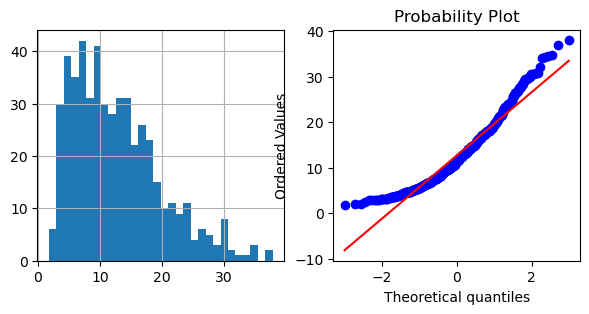

In [27]:
diagnostic_plots(data, 'LSTAT')

In [30]:
def dist_check(df, variable):
    dfit = distfit()
    results = dfit.fit_transform(df[variable].to_numpy())
    results['summary']
    dfit.plot(fontsize=12, figsize=(6, 3))

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 0.00150247] [loc=12.653 scale=7.134]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 0.00393038] [loc=1.730 scale=10.923]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 0.00393038] [loc=-1073741822.270 scale=1073741824.000]
[distfit] >INFO> [dweibull  ] [0.01 sec] [RSS: 0.00100743] [loc=11.851 scale=6.118]
[distfit] >INFO> [t         ] [0.21 sec] [RSS: 0.00134872] [loc=12.214 scale=6.524]
[distfit] >INFO> [genextreme] [0.11 sec] [RSS: 0.000506226] [loc=9.162 scale=5.225]
[distfit] >INFO> [gamma     ] [0.01 sec] [RSS: 0.00020233] [loc=1.392 scale=4.876]
[distfit] >INFO> [lognorm   ] [0.00 sec] [RSS: 0.000402476] [loc=-1.734 scale=12.730]
[distfit] >INFO> [beta      ] [0.04 sec] [RSS: 0.000132179] [loc=1.617 scale=60.197]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 0.00688187] [loc=1.730 scale=36.240]
[distfit] >INFO> [loggamma  ] [0.04 sec] [RSS: 0.00151435] [loc=-2682.537 scale=348.144]
[di

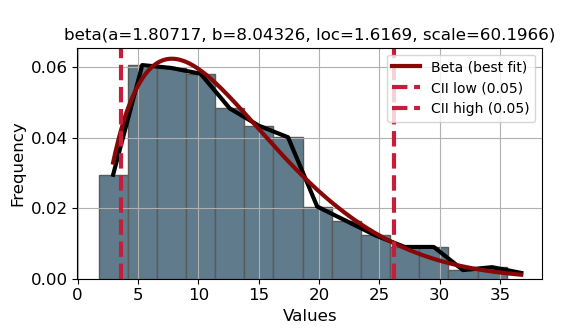

In [31]:
dist_check(data, 'LSTAT')

In [36]:
#Örnek değerlerle Matematiksel Transformation

x=np.linspace(0.1,2,5)
x
np.reciprocal(x) #1/x
np.log(x)
np.power(x,1/2)
np.power(x,1/3)

array([0.1  , 0.575, 1.05 , 1.525, 2.   ])

array([10.        ,  1.73913043,  0.95238095,  0.6557377 ,  0.5       ])

array([-2.30258509, -0.55338524,  0.04879016,  0.42199441,  0.69314718])

array([0.31622777, 0.75828754, 1.02469508, 1.2349089 , 1.41421356])

array([0.46415888, 0.83155175, 1.01639636, 1.15103876, 1.25992105])

In [48]:
tf_data=data.copy()

## Function Transformer

In [49]:
from sklearn.preprocessing import FunctionTransformer 

### np.log

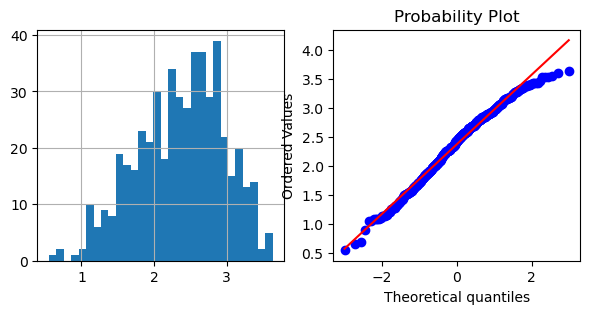

In [50]:
transformer=FunctionTransformer(func=np.log)
tf_data['LSTAT']=transformer.transform(tf_data['LSTAT'])
diagnostic_plots(tf_data, 'LSTAT')

### np.reciprocal

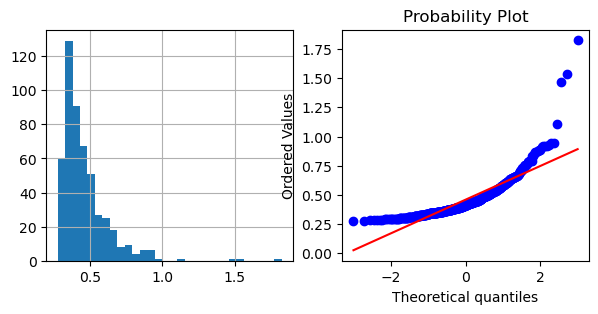

In [51]:
transformer=FunctionTransformer(func=np.reciprocal)
tf_data['LSTAT']=transformer.transform(tf_data['LSTAT'])
diagnostic_plots(tf_data, 'LSTAT')

### np.power

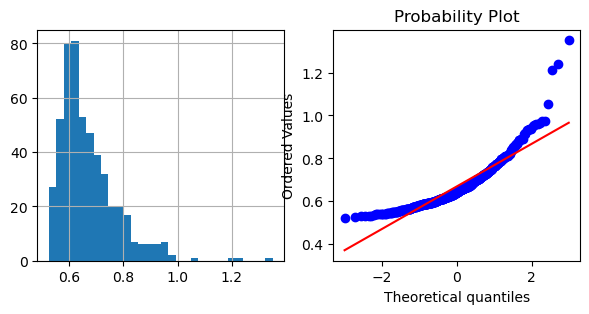

In [52]:
transformer=FunctionTransformer(func=lambda x: np.power(x,1/2))
tf_data['LSTAT']=transformer.transform(tf_data['LSTAT'])
diagnostic_plots(tf_data, 'LSTAT')

## Power Transformer

Verileri  normal dagilima en yakin dagilima sahip sekilde donusturme icin Box-Cox ve Yeo-Johnson donusumleri mecuttur.

In [53]:
from sklearn.preprocessing import PowerTransformer

In [57]:
tf_data=data.copy()

### Yeo-Johnson

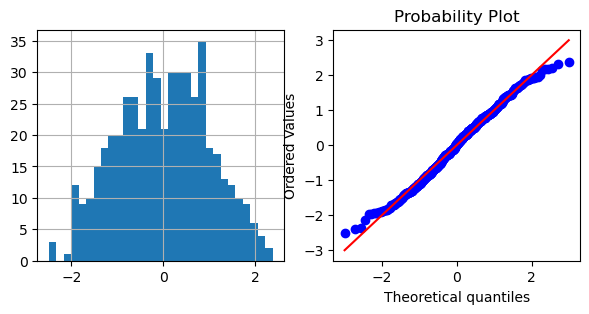

In [58]:
transformer = PowerTransformer(method='yeo-johnson')
tf_data[['LSTAT']]=transformer.fit_transform(tf_data[['LSTAT']])
diagnostic_plots(tf_data, 'LSTAT')

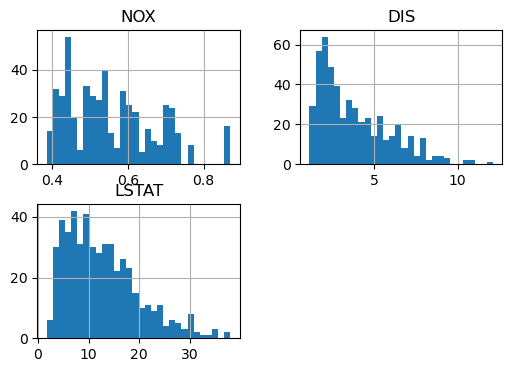

In [60]:
data[['NOX','DIS','LSTAT']].hist(bins=30, figsize=(6,4));

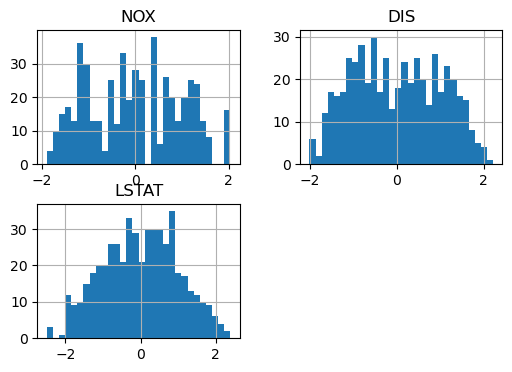

In [63]:
data_tf=data.copy()
data_tf = data_tf[['NOX','DIS','LSTAT']]

transformer = PowerTransformer(method='yeo-johnson')
data_tf=transformer.fit_transform(data_tf)
data_tf.hist(bins=30, figsize=(6,4));

## Normallik Testleri

### Shapiro-Wilk Test

In [65]:
from scipy.stats import shapiro

variable=data[['LSTAT']]
variable=data_tf[['LSTAT']]

stat, p = shapiro(variable)
print('İstatistik=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Veri normal dağılıma sahip')
else:
    print('Normal dağılıma sahip değil')

İstatistik=0.991, p=0.005
Normal dağılıma sahip değil


### Normal Test

In [66]:
from scipy.stats import normaltest

stat, p = normaltest(variable)
print('İstatistik=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Veri normal dağılıma sahip')
else:
    print('Normal dağılıma sahip değil')

İstatistik=18.611, p=0.000
Normal dağılıma sahip değil
